In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("ggplot")

In [2]:
reward_df = pd.read_csv("../learning_movies/{0}/reward_history.csv".format("mr_mario_himself_cnn"),
                           header=None,
                           names=["Episode", "Reward"])

In [3]:
reward_df.head()

Episode       Reward
0        1    34.808566
1        2   210.773350
2        3  1871.004856
3        4   473.213492
4        5   132.379718

In [4]:
def plot_rewards(project_name, ax):
    reward_df = pd.read_csv("../learning_movies/{0}/reward_history.csv".format(project_name),
                           header=None,
                           names=["Episode", "Reward"])
    ax.plot(reward_df["Episode"], reward_df["Reward"])
    ax.set_xlabel("Episode")
    ax.set_ylabel("Reward")
    ax.set_xticks(np.arange(0, reward_df["Episode"].max()+1, 10))
    ax.set_yticks(np.arange(0, reward_df["Reward"].max()+1, 250))
    ax.set_title("Rewards per Episode For {0}".format(project_name))

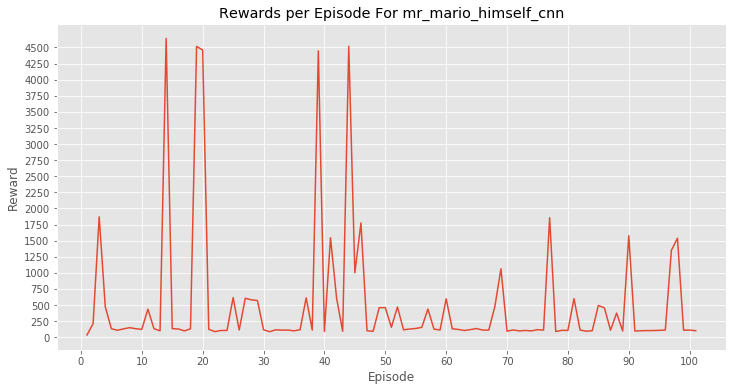

In [5]:
fig, ax = plt.subplots(figsize=(12, 6))

plot_rewards("mr_mario_himself_cnn", ax)

In [6]:
def good_episodes(project_name, threshold=1000):
    reward_df = pd.read_csv("../learning_movies/{0}/reward_history.csv".format(project_name),
                           header=None,
                           names=["Episode", "Reward"])
    return reward_df[reward_df["Reward"] > threshold].set_index("Episode")

In [7]:
good_episodes("mr_mario_himself_cnn", 250)

Reward
Episode             
3        1871.004856
4         473.213492
11        435.964814
14       4639.610094
19       4516.384699
20       4460.434671
25        615.560007
27        604.876868
28        580.672973
29        569.910309
37        611.209120
39       4447.210043
41       1545.446699
42        606.652875
44       4519.526844
45       1000.091387
46       1774.510173
49        458.221579
50        459.859994
52        470.490679
57        437.473574
60        596.359985
68        475.648777
69       1063.326269
77       1855.360284
81        598.510010
85        493.010009
86        455.739602
88        374.561559
90       1577.339432
97       1350.111747
98       1537.446195

In [8]:
def prep_to_convert_all_good_episodes(project_name, threshold):
    to_be_converted = good_episodes(project_name, threshold).index
    full_options = '' 
    for idx, episode in enumerate(good_episodes(project_name, threshold).index):
        filepath = "learning_movies/{0}/SuperMarioWorld-Snes-Start-{1:06d}.bk2".format(project_name, episode)
        full_options += filepath
        full_options += " + "
        if idx % 3 == 2:
            print(full_options[:-3], '\n')
            full_options = ''
    return full_options[:-3]

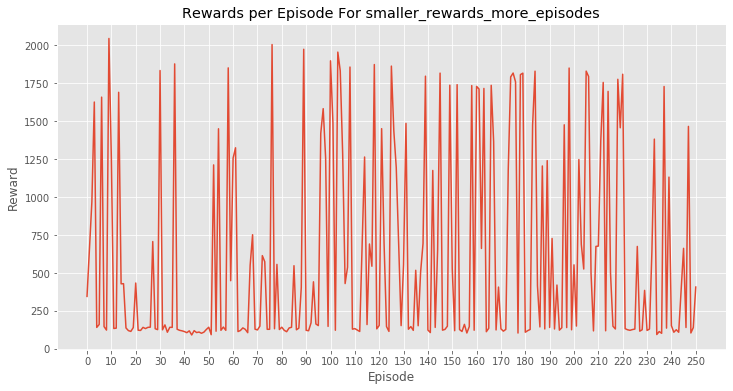

In [21]:
project_test = "smaller_rewards_more_episodes"
fig, ax = plt.subplots(figsize=(12, 6))
plot_rewards(project_test, ax)

In [22]:
smallrew = good_episodes(project_test, 1000)
smallrew

Reward
Episode             
3        1626.878246
6        1659.237395
9        2045.854785
10       1253.174625
13       1691.085028
30       1834.587046
36       1878.235023
52       1212.500668
54       1450.660020
58       1852.014167
60       1257.435028
61       1325.395138
76       2005.841507
89       1974.689211
96       1420.285021
97       1583.235023
98       1257.486227
100      1898.510027
101      1490.186084
103      1955.932393
104      1833.035024
105      1283.751858
108      1857.550438
114      1264.576073
118      1874.046466
121      1451.460212
125      1863.795841
126      1437.935021
127      1195.885055
131      1486.202131
...              ...
160      1729.785025
161      1712.785024
163      1716.506824
166      1736.974696
167      1365.651526
173      1181.110015
174      1792.466025
175      1817.909234
176      1759.406625
178      1807.566028
179      1817.289040
183      1475.110029
184      1830.241025
187      1205.535017
189      1240.604338
196      1476.886124
198      1850.860026
202      1247.827087
205      1830.610026
206      1795.188168
211      1371.560794
212      1756.115940
214      1697.010020
218      1776.780186
219      1457.191415
220      1810.069796
233      1382.485020
237      1729.236537
239      1132.060007
247      1466.360022

[66 rows x 1 columns]

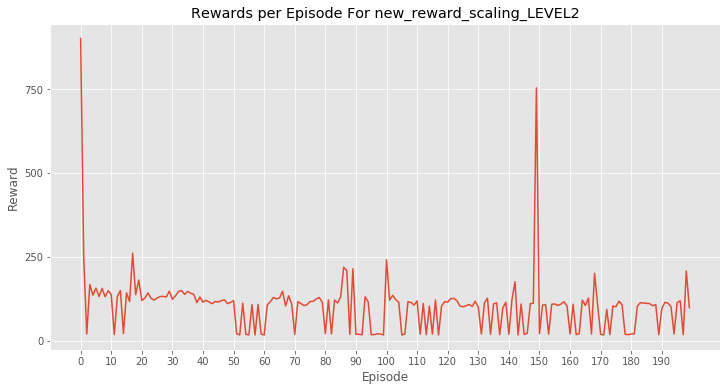

In [17]:
project2 = "new_reward_scaling_LEVEL2"
fig, ax = plt.subplots(figsize=(12, 6))
plot_rewards(project2, ax)

In [18]:
good_episodes(project2, 150)

Reward
Episode            
0        900.349795
1        252.861622
3        167.923861
5        157.054548
7        156.012179
17       260.916719
19       181.298856
86       219.293395
87       209.110003
89       214.560003
100      241.309459
142      176.060003
149      753.246163
168      201.060003
198      208.060003

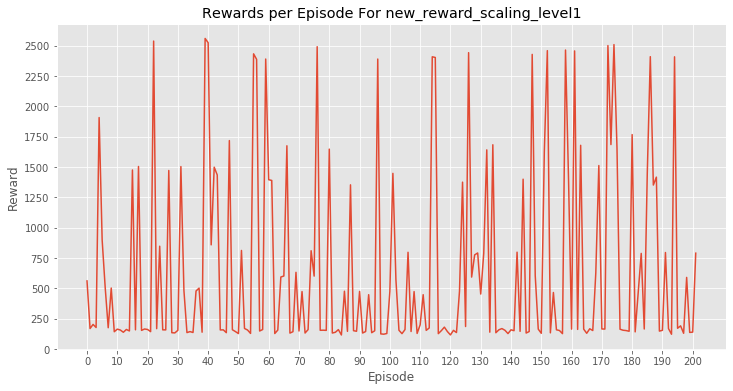

In [19]:
project1 = "new_reward_scaling_level1"
fig, ax = plt.subplots(figsize=(12, 6))
plot_rewards(project1, ax)

In [20]:
good_episodes(project1, 1000)

Reward
Episode             
4        1907.090320
15       1475.122306
17       1504.042865
22       2537.320827
27       1471.010022
31       1503.162776
39       2558.808003
40       2523.960020
42       1498.103170
43       1434.145246
47       1717.419377
55       2432.141031
56       2386.773083
59       2389.294380
60       1395.060022
61       1388.766042
66       1674.531640
76       2490.978662
80       1646.993442
87       1352.736546
96       2389.223180
101      1447.235063
114      2407.886265
115      2402.123856
124      1374.812508
126      2441.810020
132      1640.816024
134      1682.901525
144      1399.260276
147      2427.577024
151      1623.268910
152      2458.535021
158      2463.497021
159      1396.060020
161      2456.185022
163      1678.426825
169      1511.630288
172      2500.291633
173      1684.610029
174      2508.267450
175      1653.772624
180      1766.785026
185      1449.526844
186      2408.923021
187      1351.010273
188      1416.069385
194      2407.734372